# TP1 : Laplacien anisotropique

$$ \left\{\begin{array}{l}
\forall(i, j) \in 1, N_{1} \times 1, N_{2} \\
-\nu_{1} \frac{u_{i+1, j}-2 u_{i, j}+u_{i-1, j}}{h_{1}^{2}}-\nu_{2} \frac{u_{i, j+1}-2 u_{i, j}+u_{i, j-1}}{h_{2}^{2}}=c\left(x_{i, j}\right) \\
\forall i \in\left\{0, N_{1}+1\right\}, \forall j \in 1, N_{2}, \quad u_{i, j}=0 \\
\forall j \in\left\{0, N_{2}+1\right\}, \forall i \in 1, N_{1}, \quad u_{i, j}=0
\end{array}\right. $$

In [129]:
nu = [1;4]
dx1 = 1
dx2 = 2
N1 = 3
N2 = 3


nu =

     1
     4


dx1 =

     1


dx2 =

     2


N1 =

     3


N2 =

     3



In [99]:
%%file laplacian2.m
function L = laplacian2(nu,dx1,dx2,N1,N2)
%
%  Cette fonction construit la matrice de l'opérateur Laplacien 2D anisotrope
%
%  Inputs
%  ------
%
%  nu : nu=[nu1;nu2], coefficients de diffusivité dans les dierctions x1 et x2. 
%
%  dx1 : pas d'espace dans la direction x1.
%
%  dx2 : pas d'espace dans la direction x2.
%
%  N1 : nombre de points de grille dans la direction x1.
%
%  N2 : nombre de points de grilles dans la direction x2.
%
%  Outputs:
%  -------
%
%  L      : Matrice de l'opérateur Laplacien (dimension N1N2 x N1N2)
%
% 

% Initialisation
b1 = nu(1)/dx1^2;
b2 = nu(2)/dx2^2;
a = 2*(b1+b2);

L = spdiags(ones(N1*N2,1).*[-b1 -b2 a -b2 -b1], [-N2, -1, 0, 1, N2], N1*N2, N1*N2);
end

Created file '/home/jblancho/Le-TP-de-Keunotor/edp/tp/tp1/laplacian.m'.


In [135]:
%%file laplacian.m
function L = laplacian(nu,dx1,dx2,N1,N2)
%
%  Cette fonction construit la matrice de l'opérateur Laplacien 2D anisotrope
%
%  Inputs
%  ------
%
%  nu : nu=[nu1;nu2], coefficients de diffusivité dans les dierctions x1 et x2. 
%
%  dx1 : pas d'espace dans la direction x1.
%
%  dx2 : pas d'espace dans la direction x2.
%
%  N1 : nombre de points de grille dans la direction x1.
%
%  N2 : nombre de points de grilles dans la direction x2.
%
%  Outputs:
%  -------
%
%  L      : Matrice de l'opérateur Laplacien (dimension N1N2 x N1N2)
%
% 

% Initialisation
b1 = nu(1)/dx1^2;
b2 = nu(2)/dx2^2;
a = 2*(b1+b2);

A = spdiags(ones(N2,1)*[-b2 a -b2], -1:1, N2, N2);
D = spdiags(ones(N2,1)*[-b1], 0, N2, N2);

L   = sparse([]);
    for i = 1:N1
       is = ( i - 1 ) * N2+1;
       ie = i * N2;
       L(is:ie,is:ie) = A;
       if ( i < N1 )
          L(is:ie,ie+1:ie+N2) = D;
          L(ie+1:ie+N2,is:ie) = D;
       end
    end
    is = ( N1 - 1 ) * N2 + 1;
end

Created file '/home/jblancho/Le-TP-de-Keunotor/edp/tp/tp1/laplacian.m'.


In [136]:
L1 = full(laplacian(nu,dx1,dx2,N1,N2))


L1 =

     4    -1     0    -1     0     0     0     0     0
    -1     4    -1     0    -1     0     0     0     0
     0    -1     4    -1     0    -1     0     0     0
    -1     0    -1     4    -1     0    -1     0     0
     0    -1     0    -1     4    -1     0    -1     0
     0     0    -1     0    -1     4    -1     0    -1
     0     0     0    -1     0    -1     4    -1     0
     0     0     0     0    -1     0    -1     4    -1
     0     0     0     0     0    -1     0    -1     4



In [137]:
L2 = full(laplacian2(nu,dx1,dx2,N1,N2))


L2 =

     4    -1     0    -1     0     0     0     0     0
    -1     4    -1     0    -1     0     0     0     0
     0    -1     4     0     0    -1     0     0     0
    -1     0     0     4    -1     0    -1     0     0
     0    -1     0    -1     4    -1     0    -1     0
     0     0    -1     0    -1     4     0     0    -1
     0     0     0    -1     0     0     4    -1     0
     0     0     0     0    -1     0    -1     4    -1
     0     0     0     0     0    -1     0    -1     4



In [138]:
L1 == L2


ans =

  9x9 logical array

   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1
   1   1   1   0   1   1   1   1   1
   1   1   0   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   0   1   1
   1   1   1   1   1   0   1   1   1
   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1



In [139]:
%%file forcing.m
function b=forcing(nu, dx1, dx2, N1, N2)
%
%  Cette fonction construit le vecteur de forçage de l'EDP
%
%  Inputs
%  ------
%
%  nu : nu=[nu1;nu2], coefficients de diffusivité dans les dierctions x1 et x2. 
%
%  dx1 : pas d'espace dans la direction x1.
%
%  dx2 : pas d'espace dans la direction x2.
%
%  N1 : nombre de points de grille dans la direction x1.
%
%  N2 : nombre de points de grilles dans la direction x2.
%
%  Outputs:
%  -------
%
%  b      : vecteur de forçage (dimension N1N2)
%
% 

% Initialisation

b= -ones(N1*N2,1);

end

Created file '/home/jblancho/Le-TP-de-Keunotor/edp/tp/tp1/forcing.m'.


In [140]:
forcing(nu,dx1,dx2,N1,N2)


ans =

    -1
    -1
    -1
    -1
    -1
    -1
    -1
    -1
    -1



In [143]:
%%file diffusivity.m
function [uhref]=diffusivity(nu,L1,L2,N1,N2)
%
%  Cette fonction résoud le problème du calcul d'une solution du Laplacien anisotrope. 
%
%  Inputs
%  ------
%
%  nu: [nu1;nu2] valeurs des paramètres de diffusivité.
%
%  L1 : longeur du domaine dans la direction x1.
%
%  L2 : longueur du domaine dans la direction x2.
%
%  N1 :  nombre de points de grille dans la direction x1.
%
%  N2 :  nombre de points de grille dans la direction x2.
%  
%
%  Outputs:
%  -------
%
%  uhref : vecteur de taille N1*N2 contenant une approximation de la solution
%
% Ajout du repertoire Affichage à l'environnement
  addpath('Affichage');

% Construction de la grille
 dx1 = L1/(N1+1);
 dx2 = L2/(N2+1);

% Calcul de la solution
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
 

   % Calcul de la matrice du systeme

   L = laplacian(nu,dx1,dx2,N1,N2);
   c = forcing(nu,dx1,dx2,N1,N2);

    % L*u = c
   uhref=L\c;
      
  %Affichage de la solution approximee
  fig_ref = plot_uh(uhref,dx1,dx2,N1,N2,2); drawnow;
  
end



Created file '/home/jblancho/Le-TP-de-Keunotor/edp/tp/tp1/diffusivity.m'.



uhref =

   -0.0430
   -0.0547
   -0.0430
   -0.0547
   -0.0703
   -0.0547
   -0.0430
   -0.0547
   -0.0430



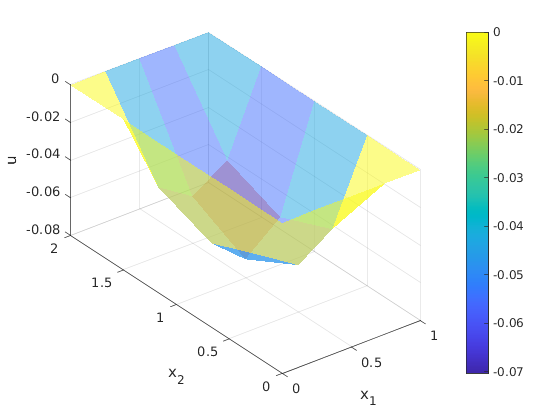

In [144]:
L1 = dx1;
L2 = dx2;
[uhref] = diffusivity(nu,L1,L2,N1,N2)

In [ ]:
%%file laplacian3.m
function L = laplacian2(nu,dx1,dx2,N1,N2)
%
%  Cette fonction construit la matrice de l'opérateur Laplacien 2D anisotrope
%
%  Inputs
%  ------
%
%  nu : nu=[nu1;nu2], coefficients de diffusivité dans les dierctions x1 et x2. 
%
%  dx1 : pas d'espace dans la direction x1.
%
%  dx2 : pas d'espace dans la direction x2.
%
%  N1 : nombre de points de grille dans la direction x1.
%
%  N2 : nombre de points de grilles dans la direction x2.
%
%  Outputs:
%  -------
%
%  L      : Matrice de l'opérateur Laplacien (dimension N1N2 x N1N2)
%
% 

% Initialisation
b1 = nu(1)/dx1^2;
b2 = nu(2)/dx2^2;
a = 2*(b1+b2);

L = spdiags(ones(N1*N2,1).*[-b1 -b2 a -b2 -b1], [-N2, -1, 0, 1, N2], N1*N2, N1*N2);
end